# Spam Classification
## Yash Rohilla J051

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[to_drop], axis=1)
# Renaming the columns because I feel fancy today
df.rename(columns = {"v1":"target", "v2":"text"}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df['target'] = enc.fit_transform(df['target'])

In [5]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [6]:
df.duplicated().sum()

403

In [7]:
df=df.drop_duplicates(keep='first')

In [8]:
df.shape

(5169, 2)

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [11]:
ratio_spam = df['target'].value_counts()[1]/df.shape[0]
ratio_spam

0.12633004449603405

not an extreme imbalance, sampling not required (maybe)

# EDA

Text(0.5, 1.0, 'HAM vs SPAM')

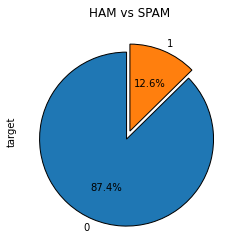

In [12]:
df['target'].value_counts().plot.pie(explode = [0.1,0], autopct = "%.1f%%",startangle = 90, wedgeprops={'edgecolor':'black', 'linewidth':1}).set_title('HAM vs SPAM')

In [13]:
from wordcloud import WordCloud, STOPWORDS
stop_words = list(STOPWORDS)
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

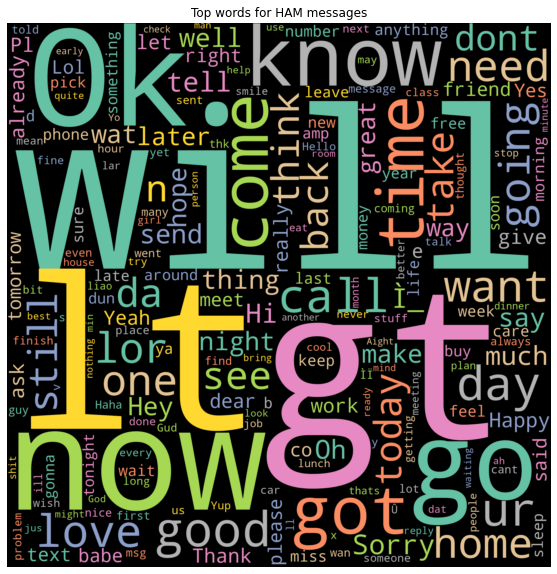

In [14]:
wc_ham = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stop_words).generate(' '.join(text for text in df.loc[df['target'] == 0, 'text']))
plt.figure(figsize=(10,10))
plt.title('Top words for HAM messages')
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

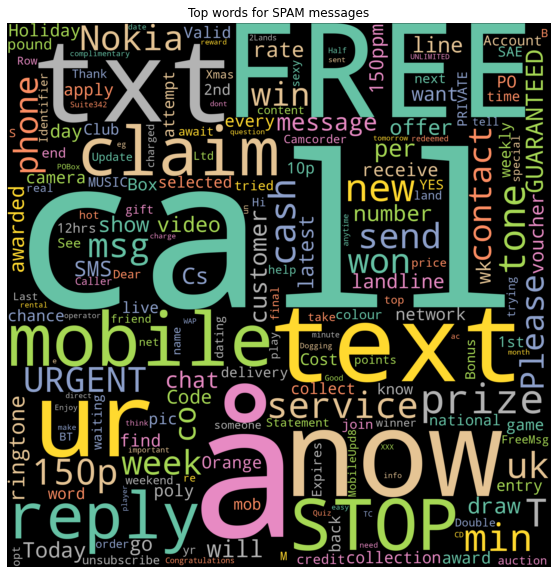

In [15]:
wc_spam = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2', 
               collocations=False, stopwords = stop_words).generate(' '.join(text for text in df.loc[df['target'] == 1, 'text']))
plt.figure(figsize=(10,10))
plt.title('Top words for SPAM messages')
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

# Preprocessing

## Cleaning

In [16]:
df2=df # df2=original

In [17]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_characters'] = df['text'].apply(len)

In [18]:
import re
import string

'''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers, remove multiple spaces'''

def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

In [19]:
df['text'] = df['text'].apply(clean_text)
df.head()

,target,text,num_words,num_characters
0,0,go until jurong point crazy available only in ...,24,111
1,0,ok lar joking wif u oni,8,29
2,1,free entry in a wkly comp to win fa cup final ...,37,155
3,0,u dun say so early hor u c already then say,13,49
4,0,nah i dont think he goes to usf he lives aroun...,15,61


In [20]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

stop_words = list(stopwords.words('english')) + list(punctuation)
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df['text'] = df['text'].apply(remove_stopwords)
df.head()

,target,text,num_words,num_characters
0,0,go jurong point crazy available bugis n great ...,24,111
1,0,ok lar joking wif oni,8,29
2,1,free entry wkly comp win fa cup final tkts may...,37,155
3,0,dun say early hor already say,13,49
4,0,nah dont think goes usf lives around though,15,61


## Stemming/Lemmatization

In [21]:
stemmer = SnowballStemmer("english")
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [22]:
df['text'] = df['text'].apply(stemm_text)
df.head()

,target,text,num_words,num_characters
0,0,go jurong point crazi avail bugi n great world...,24,111
1,0,ok lar joke wif oni,8,29
2,1,free entri wkli comp win fa cup final tkts may...,37,155
3,0,dun say earli hor alreadi say,13,49
4,0,nah dont think goe usf live around though,15,61


In [23]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemm_text(text):
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
    return text

In [24]:
'''
df['text'] = df['text'].apply(lambda text: lemm_text(text))
df.head()
'''

"\ndf['text'] = df['text'].apply(lambda text: lemm_text(text))\ndf.head()\n"

In [25]:
X = df['text']
y = df['target']

# Vectorization

If we have to convert the text data into numerical data,
We can do it through many methods -

1. Bag of Words (BOW)
2. TF-IDF
3. Word2Vec
4. GloVe
5. FastText

In [26]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
vector = tf.fit_transform(df['text'])

X = vector.toarray()
y = df['target']  # as y will be the same

In [27]:
X.shape

(5169, 6737)

In [28]:
y.shape

(5169,)

# Model Building

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

In [31]:
key = ['LogisticRegression','MultinomialNB','SVC','RandomForestClassifier','XGBClassifier','SGDClassifier','CatBoostClassifier']
value = [LogisticRegression(class_weight='balanced'), MultinomialNB(),SVC(class_weight='balanced'), RandomForestClassifier(class_weight='balanced',criterion='gini'), 
         xgb.XGBClassifier(random_state=51, class_weight='balanced'),SGDClassifier(eta0=1,random_state=51,class_weight='balanced'),
         CatBoostClassifier(random_state=51, scale_pos_weight=7.5, verbose=0)]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(class_weight='balanced'),
 'MultinomialNB': MultinomialNB(),
 'SVC': SVC(class_weight='balanced'),
 'RandomForestClassifier': RandomForestClassifier(class_weight='balanced'),
 'XGBClassifier': XGBClassifier(base_score=None, booster=None, class_weight='balanced',
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, gamma=None, gpu_id=None,
               importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=51, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None),
 'SGDClassifier': SGDClassifier(class_weight='balanced', eta0=1, random_state=51),
 'C

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, auc, average_precision_score
from sklearn.metrics import confusion_matrix
acc1=[]
roc1=[]
pr_auc1=[]

for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    acc1.append(acc)
    roc = roc_auc_score(predict ,y_test)
    roc1.append(roc)
    pr_auc = average_precision_score(predict, y_test)
    pr_auc1.append(pr_auc)
    print(name,'\t', acc,'\t', pr_auc,'\t', roc)
    
result={
    'Model': key,
    'Accuracy': acc1,
    'Precision Recall': pr_auc1,
    'AUC-ROC' : roc1
}
model_results = pd.DataFrame(result)

LogisticRegression 	 0.9706109822119103 	 0.8208281659642264 	 0.9403429786986042
MultinomialNB 	 0.9520494972931168 	 0.6666666666666666 	 0.9734816082121471
SVC 	 0.9698375870069605 	 0.7939711389190012 	 0.9717189183060264
RandomForestClassifier 	 0.9675174013921114 	 0.7750037678666082 	 0.9787026310446549


C:\Users\rohil\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 	 0.9682907965970611 	 0.7949374930061058 	 0.949510585733496
SGDClassifier 	 0.9737045630317092 	 0.8308838705141377 	 0.9560612842842027
CatBoostClassifier 	 0.9613302397525135 	 0.7790719461199644 	 0.9143536174725132


# Results

In [33]:
model_results.sort_values('Accuracy', ascending = False)

,Model,Accuracy,Precision Recall,AUC-ROC
5,SGDClassifier,0.973705,0.830884,0.956061
0,LogisticRegression,0.970611,0.820828,0.940343
2,SVC,0.969838,0.793971,0.971719
4,XGBClassifier,0.968291,0.794937,0.949511
3,RandomForestClassifier,0.967517,0.775004,0.978703
6,CatBoostClassifier,0.961330,0.779072,0.914354
1,MultinomialNB,0.952049,0.666667,0.973482


SGDClassifier performing best.